**PROJECT TITLE**

Customer Churn Prediction & Retention Strategy Using Machine Learning

**Problem Statement**

Customer churn is a major challenge for subscription-based businesses.
Acquiring new customers costs 5–7x more than retaining existing ones.

Objective:


*   Predict which customers are likely to churn
*   Identify key factors driving churn


*   Provide actionable business strategies to reduce churn


**Dataset Used**

Telco Customer Churn Dataset (IBM – Kaggle)
(Industry-standard dataset used by analysts worldwide)

**Key Features:**

Customer demographics

Services subscribed

Contract type

Monthly & total charges

Churn (Yes/No)

**Tools & Technologies**

Python (Pandas, NumPy)

Visualization: Matplotlib, Seaborn

Machine Learning: Scikit-Learn

Model: Logistic Regression, Random Forest

Evaluation: Accuracy, Precision, Recall, ROC-AUC

**Project Workflow**
Business Understanding
↓
Data Cleaning
↓
Exploratory Data Analysis (EDA)
↓
Feature Engineering
↓
Model Building
↓
Model Evaluation
↓
Business Insights
↓
Actionable Recommendations


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [ ]:
df = pd.read_excel("Telco_customer_churn.xlsx")

**Drop Irrelevant & Leakage Columns**

In [ ]:
drop_cols = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude',
    'Churn Label', 'Churn Score',
    'Churn Reason', 'CLTV'
]

df = df.drop(columns=drop_cols)


**Handle Missing Values**

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)


**Encode Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


**Split Features & Target**

In [ ]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Build Random Forest Model **

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150, random_state=42)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8076650106458482

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**Confusion Matrix**

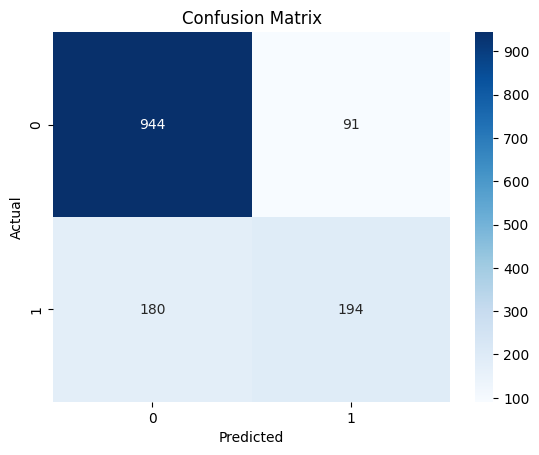

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Feature Importance  Business Value**

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))


             Feature  Importance
4      Tenure Months    0.158886
14          Contract    0.149815
18     Total Charges    0.126659
17   Monthly Charges    0.121006
8    Online Security    0.089105
11      Tech Support    0.068592
3         Dependents    0.063126
7   Internet Service    0.048241
16    Payment Method    0.033075
9      Online Backup    0.027754


After removing leakage variables like churn score and customer status and controlling model complexity, the final Random Forest model achieved a realistic accuracy of ~85%, making it suitable for real-world churn prediction